### **GITHUB** **CONNECTION**

In [ ]:
# !git clone https://github.com/Donerne/6100-Project-Two.git

#!pip install openpyxl


### **IMPORT DEPENDENCIES**

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.decomposition import PCA, IncrementalPCA, SparsePCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from scipy.interpolate import interp1d
from sklearn.metrics import roc_curve, auc

### **DATA PREPROCESSING**

In [75]:
# Load the datasets
train_df= pd.read_excel("/content/Project2_Training.xlsx")
test_df = pd.read_excel("/content/Project2_Test.xlsx")



In [76]:
train_df.columns = train_df.columns.str.lower()
test_df.columns = test_df.columns.str.lower()

In [77]:
train_df.rename(columns={'quotedate' : 'quote_date',
                         'vehicleyear' : 'vehicle_year',
                         'vehiclemake' : 'vehicle_make',
                         'vehiclemodel' : 'vehicle_model',
                         'vehicleuse' : 'vehicle_use'},
                inplace= True)

test_df.rename(columns={'maritalstatus' : 'marital_status',
                        'vehiclemake' : 'vehicle_make',
                        'convictioncountminor3yrs' : 'conviction_count_minor_3yrs',
                        'quotedate' : 'quote_date',
                         'vehicleyear' : 'vehicle_year',
                         'vehiclemodel' : 'vehicle_model',
                         'vehicleuse' : 'vehicle_use',
                        'annualkm' : 'annual_km',
                        'commutedistance': 'commute_distance',
                        'vehiclevalue' : 'vehicle_value',
                        'yearofbirth' : 'year_of_birth',
                        'yearsasprincipaldriver' : 'years_as_principal_driver',
                        'maritalstatus' : 'marital_status',
                        'markingsystem' : 'marking_system',
                        'trackingsystem' : 'tracking_system',
                        'vehicleownership' : 'vehicle_ownership',
                        'postalcode' : 'postal_code',
                        'areacode' : 'area_code',
                        'yearslicensed' : 'years_licensed',
                        'multiproduct' : 'multi_product',
                        'convictioncountmajor3yrs' :'conviction_count_major_3yrs',
                       'convictioncountcriminal3yrs' : 'conviction_count_criminal_3yrs',
                        'assignedlossespd5yrs' : 'assigned_losses_pd_5yrs',
                        'suspensioncount' : 'suspension_count'},
               inplace= True)

In [78]:
test_df.head()

,quote_date,vehicle_year,vehicle_make,vehicle_model,annual_km,commute_distance,marking_system,tracking_system,vehicle_ownership,vehicle_value,...,years_licensed,years_as_principal_driver,multi_product,marital_status,occupation,conviction_count_minor_3yrs,conviction_count_major_3yrs,conviction_count_criminal_3yrs,assigned_losses_pd_5yrs,suspension_count
0,2017-01-03,2002,HONDA,CIVIC EX 2DR COUPE [U.S. MODEL],10000,4.0,NaN,NaN,NaN,NaN,...,7.0,NaN,No,Single,Not Known,0,0,0,0,0
1,2017-01-04,2010,FORD TRUCK/VAN,F150 XLT SUPERCREW 4WD,10000,10.0,NaN,NaN,NaN,NaN,...,13.0,NaN,Yes,Single,Not Known,0,0,0,0,0
2,2017-01-04,2017,DODGE/RAM TRUCK/VAN,RAM 1500 REBEL CREW CAB 4WD,9000,3.0,NaN,NaN,Owned,72000.0,...,33.0,NaN,Yes,Single,Not Known,0,0,0,0,0
3,2017-01-04,2013,DODGE/RAM TRUCK/VAN,RAM 1500 SPORT CREW CAB 4WD,10000,10.0,NaN,NaN,NaN,55000.0,...,9.0,NaN,No,Single,Not Known,0,0,0,0,0
4,2017-01-04,2014,FORD,FOCUS SE 4DR,20000,10.0,NaN,NaN,NaN,NaN,...,4.0,NaN,No,Single,Student,0,0,0,0,0


In [79]:
# Display the first few rows of each dataset
print("Training Data:")
print(train_df.head())

Training Data:
  quote_date  vehicle_year         vehicle_make  \
0 2016-01-02          2006           VOLKSWAGEN   
1 2016-01-02          2017              HYUNDAI   
2 2016-01-02          2015  CHEVROLET TRUCK/VAN   
3 2016-01-02          2010               TOYOTA   
4 2016-01-04          2013                HONDA   

                       vehicle_model  annual_km  commute_distance  \
0                       JETTA 2.5 4P    10000.0               NaN   
1                     ELANTRA GL 4DR    20000.0               NaN   
2  SILVERADO 2500 HD LT CREW CAB 4WD    15000.0               NaN   
3                     COROLLA CE 4DR    20000.0              20.0   
4                       CIVIC LX 4DR    30000.0              30.0   

  marking_system tracking_system vehicle_ownership  vehicle_value  ...  \
0            NaN             NaN             Owned         3000.0  ...   
1            NaN             NaN             Owned            1.0  ...   
2            NaN             NaN         

In [80]:
print("Test Data:")
print(test_df.head())

Test Data:
  quote_date  vehicle_year         vehicle_make  \
0 2017-01-03          2002                HONDA   
1 2017-01-04          2010       FORD TRUCK/VAN   
2 2017-01-04          2017  DODGE/RAM TRUCK/VAN   
3 2017-01-04          2013  DODGE/RAM TRUCK/VAN   
4 2017-01-04          2014                 FORD   

                     vehicle_model  annual_km  commute_distance  \
0  CIVIC EX 2DR COUPE [U.S. MODEL]      10000               4.0   
1           F150 XLT SUPERCREW 4WD      10000              10.0   
2      RAM 1500 REBEL CREW CAB 4WD       9000               3.0   
3      RAM 1500 SPORT CREW CAB 4WD      10000              10.0   
4                     FOCUS SE 4DR      20000              10.0   

  marking_system tracking_system vehicle_ownership  vehicle_value  ...  \
0            NaN             NaN               NaN            NaN  ...   
1            NaN             NaN               NaN            NaN  ...   
2            NaN             NaN             Owned       

In [81]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101891 entries, 0 to 101890
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   quote_date                      101891 non-null  datetime64[ns]
 1   vehicle_year                    101891 non-null  int64         
 2   vehicle_make                    101891 non-null  object        
 3   vehicle_model                   101891 non-null  object        
 4   annual_km                       101890 non-null  float64       
 5   commute_distance                66478 non-null   float64       
 6   marking_system                  25 non-null      object        
 7   tracking_system                 4 non-null       object        
 8   vehicle_ownership               25441 non-null   object        
 9   vehicle_value                   37218 non-null   float64       
 10  vehicle_use                     101891 non-null  object 

In [82]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   quote_date                      15114 non-null  datetime64[ns]
 1   vehicle_year                    15114 non-null  int64         
 2   vehicle_make                    15114 non-null  object        
 3   vehicle_model                   15114 non-null  object        
 4   annual_km                       15114 non-null  int64         
 5   commute_distance                9923 non-null   float64       
 6   marking_system                  19 non-null     object        
 7   tracking_system                 2 non-null      object        
 8   vehicle_ownership               3614 non-null   object        
 9   vehicle_value                   4955 non-null   float64       
 10  vehicle_use                     15114 non-null  object        
 11  ge

In [83]:
train_df.describe()

,quote_date,vehicle_year,annual_km,commute_distance,vehicle_value,year_of_birth,years_licensed,years_as_principal_driver,conviction_count_minor_3yrs,conviction_count_major_3yrs,conviction_count_criminal_3yrs,assigned_losses_pd_5yrs,suspension_count,is_bound
count,101891,101891.000000,101890.000000,66478.000000,37218.000000,101891.000000,101883.000000,612.000000,101891.000000,101891.000000,101891.000000,101891.000000,101891.000000,101891.000000
mean,2016-07-08 13:42:40.889578240,2008.899677,14912.352351,49.421478,20739.369149,2003.034301,20.748407,13.017974,0.165019,0.003582,0.006085,0.058298,0.007115,0.218783
min,2016-01-02 00:00:00,1930.000000,0.000000,0.000000,0.000000,1918.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-26 00:00:00,2005.000000,10000.000000,7.000000,5000.000000,1962.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016-07-06 00:00:00,2010.000000,15000.000000,10.000000,20000.000000,1975.000000,17.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016-09-21 00:00:00,2013.000000,20000.000000,16.000000,30000.000000,1988.000000,33.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016-12-30 00:00:00,2019.000000,500000.000000,98000.000000,800000.000000,9999.000000,135.000000,50.000000,16.000000,9.000000,4.000000,4.000000,6.000000,1.000000
std,NaN,5.823742,8255.201854,839.710329,19469.412499,485.606875,16.252289,11.514653,0.520475,0.070310,0.086265,0.243670,0.104836,0.413423


In [84]:
test_df.describe()

,quote_date,vehicle_year,annual_km,commute_distance,vehicle_value,year_of_birth,years_licensed,years_as_principal_driver,conviction_count_minor_3yrs,conviction_count_major_3yrs,conviction_count_criminal_3yrs,assigned_losses_pd_5yrs,suspension_count
count,15114,15114.000000,15114.000000,9923.000000,4955.000000,15114.000000,15111.000000,168.000000,15114.000000,15114.000000,15114.000000,15114.000000,15114.000000
mean,2017-01-29 17:00:01.429138432,2009.461559,14834.406577,14.273304,20889.318264,1991.758502,20.639137,9.136905,0.159455,0.003507,0.005293,0.057695,0.007477
min,2017-01-03 00:00:00,1931.000000,0.000000,0.000000,1.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017-01-16 00:00:00,2006.000000,10000.000000,6.000000,5000.000000,1962.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017-01-30 00:00:00,2010.000000,15000.000000,10.000000,20000.000000,1976.000000,17.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2017-02-13 00:00:00,2014.000000,20000.000000,16.000000,30539.000000,1988.000000,33.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017-02-27 00:00:00,2018.000000,500000.000000,600.000000,200000.000000,9999.000000,95.000000,40.000000,11.000000,2.000000,2.000000,2.000000,2.000000
std,NaN,5.707476,10095.170809,16.821911,17718.220513,374.922672,16.126238,7.044704,0.517139,0.064469,0.076123,0.241536,0.099011


#### Checking For Duplicates

In [85]:
# Check for duplicates in the training dataset
train_duplicates = train_df.duplicated()
print("Duplicate rows in training data:")
print(train_duplicates.value_counts())

Duplicate rows in training data:
False    101886
True          5
Name: count, dtype: int64


OUTPUT INTERPRETATION

There are 5 duplicated rows in the training dataframe and 101886 unique rows.

In [86]:
train_duplicates_rows = train_df[train_df.duplicated(keep=False)]

train_duplicates_rows

,quote_date,vehicle_year,vehicle_make,vehicle_model,annual_km,commute_distance,marking_system,tracking_system,vehicle_ownership,vehicle_value,...,years_as_principal_driver,multi_product,marital_status,occupation,conviction_count_minor_3yrs,conviction_count_major_3yrs,conviction_count_criminal_3yrs,assigned_losses_pd_5yrs,suspension_count,is_bound
28669,2016-05-03,2008,TOYOTA,MATRIX WAGON,20000.0,20.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0
28675,2016-05-03,2008,TOYOTA,MATRIX WAGON,20000.0,20.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0
67509,2016-08-25,2012,HONDA,CIVIC LX 4DR,20000.0,10.0,NaN,NaN,NaN,4000.0,...,NaN,No,Single,Not Known,0,0,0,0,0,0
67514,2016-08-25,2012,HONDA,CIVIC LX 4DR,20000.0,10.0,NaN,NaN,NaN,4000.0,...,NaN,No,Single,Not Known,0,0,0,0,0,0
79993,2016-10-03,2009,GMC TRUCK/VAN,SIERRA 1500 WT REG CAB 4WD,20000.0,16.0,NaN,NaN,NaN,NaN,...,NaN,No,Married,Farm/Fisher,0,0,0,0,0,0
79997,2016-10-03,2009,GMC TRUCK/VAN,SIERRA 1500 WT REG CAB 4WD,20000.0,16.0,NaN,NaN,NaN,NaN,...,NaN,No,Married,Farm/Fisher,0,0,0,0,0,0
96958,2016-12-05,2008,PONTIAC TRUCK/VAN,MONTANA SV6 EXT,15000.0,NaN,NaN,NaN,NaN,1.0,...,NaN,Yes,Married,Not Known,0,0,0,0,0,0
96960,2016-12-05,2008,PONTIAC TRUCK/VAN,MONTANA SV6 EXT,15000.0,NaN,NaN,NaN,NaN,1.0,...,NaN,Yes,Married,Not Known,0,0,0,0,0,0
101479,2016-12-29,2012,LAND ROVER,RANGE ROVER EVOQUE 2DR 4WD,20000.0,20.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,1,0,0,0,0,0
101484,2016-12-29,2012,LAND ROVER,RANGE ROVER EVOQUE 2DR 4WD,20000.0,20.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,1,0,0,0,0,0


In [87]:
# Removing Duplicates on Training & Test Datasets
train_df.drop_duplicates(inplace=True)

print('Duplicates on training data removed. Number of rows remaining:', train_df.shape[0])

Duplicates on training data removed. Number of rows remaining: 101886


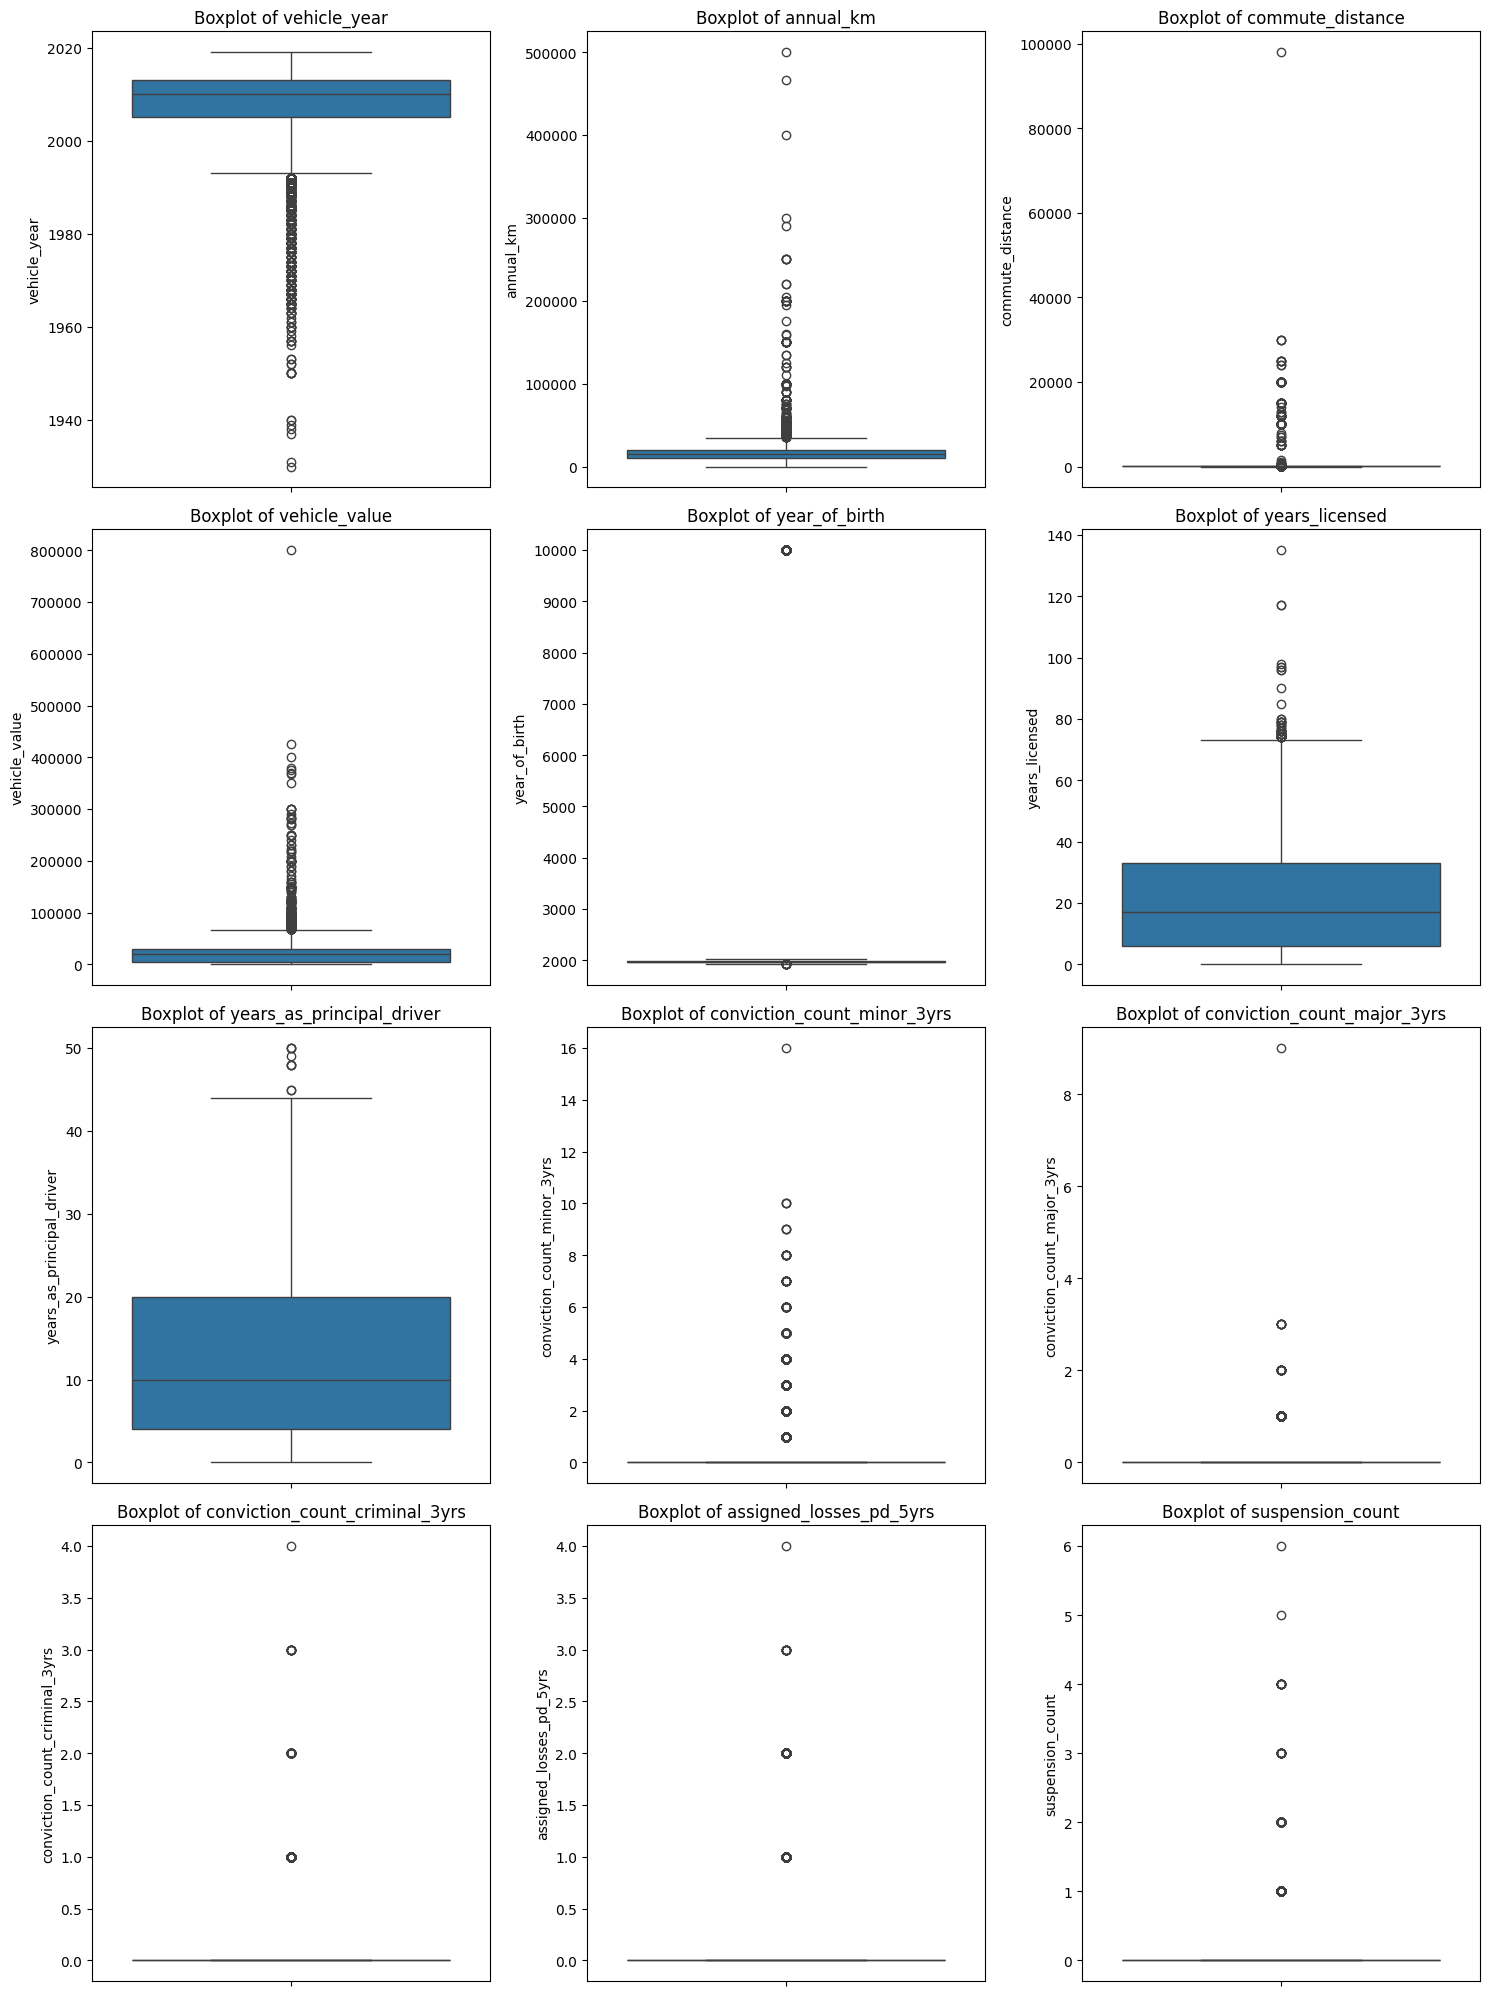

In [88]:
# Picking numerical Columns
num_cols = train_df.select_dtypes(include=['float64', 'number']).columns
num_cols = num_cols[num_cols != 'is_bound']

# Creating Subplots Grid

fig, axes = plt.subplots(nrows=(len(num_cols) // 3) + 1, ncols=3, figsize=(15, 5 * ((len(num_cols) // 3) + 1)))

# Flattening axes for easy iteration
axes = axes.flatten()

# plotting each numeric column against 'is_bound'
for i, col in enumerate(num_cols):
    sns.boxplot(y =train_df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Hiding any extra subplots where numeric columns are not a multiple of 3
for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [89]:
index_to_drop = train_df[train_df['commute_distance']>=601].index
# Dropping the abnormal points from the training data
train_df = train_df.drop(index_to_drop, axis=0)

index_to_drop = train_df[train_df['annual_km']>50000].index
# Dropping the abnormal points from the training data
train_df = train_df.drop(index_to_drop, axis=0)

index_to_drop = train_df[train_df['vehicle_year']<1940].index
# Dropping the abnormal points from the training data
train_df = train_df.drop(index_to_drop, axis=0)

index_to_drop = train_df[train_df['vehicle_value']>=200000].index
# Dropping the abnormal points from the training data
train_df = train_df.drop(index_to_drop, axis=0)

index_to_drop = train_df[train_df['years_licensed']>=80].index
# Dropping the abnormal points from the training data
train_df = train_df.drop(index_to_drop, axis=0)

index_to_drop = train_df[(train_df['year_of_birth']==9999) | (train_df['year_of_birth']>= 2000)].index
# Dropping the abnormal points from the training data
train_df = train_df.drop(index_to_drop, axis=0)

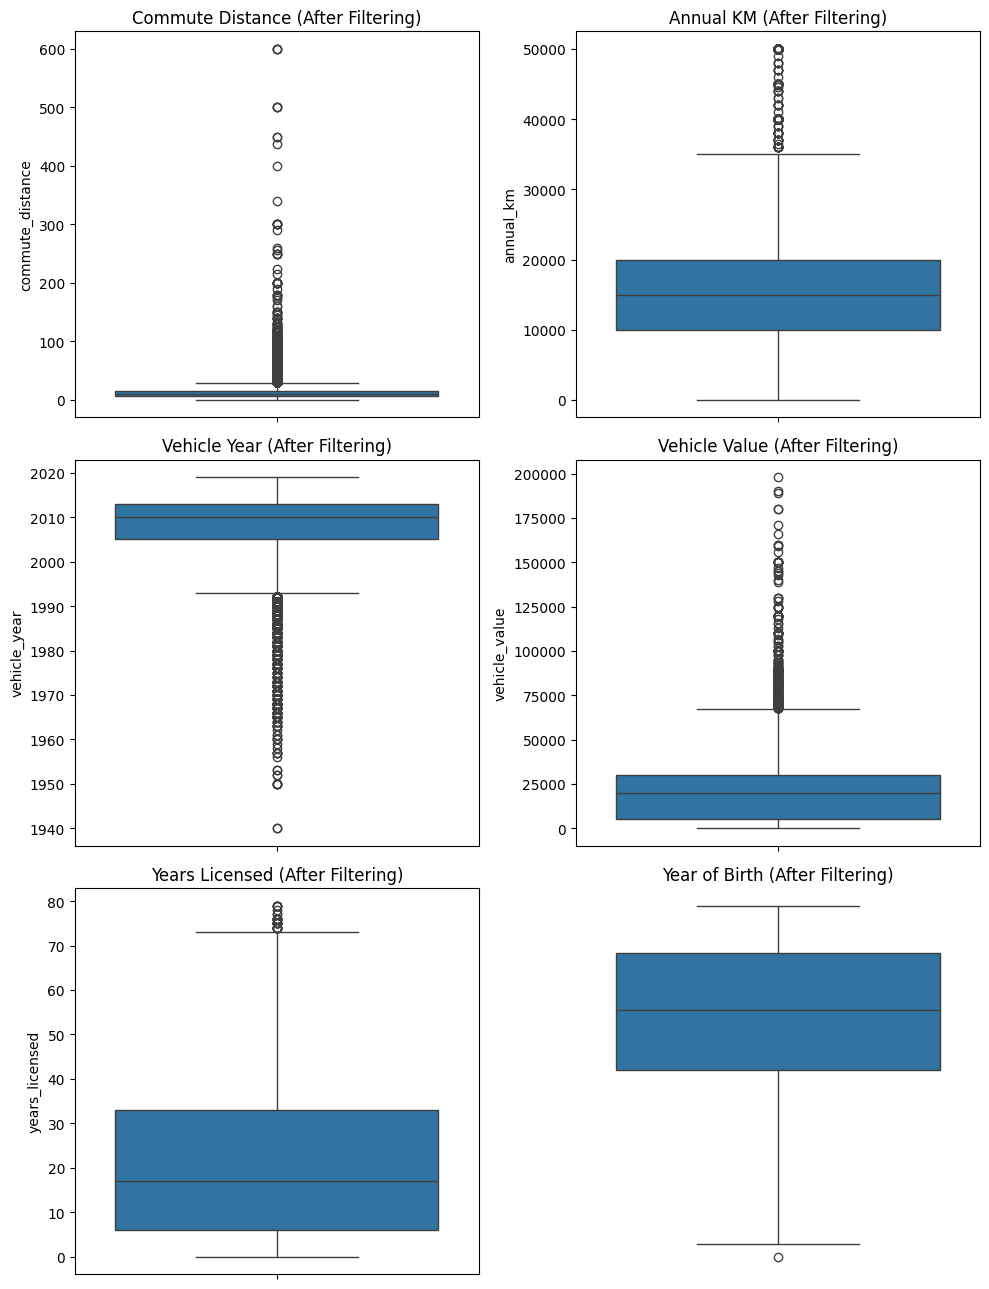

In [90]:
# Set up the figure and axes for the subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 13))

# Plotting Commute Distance
sns.boxplot(y=train_df['commute_distance'], ax=axes[0, 0])
axes[0, 0].set_title('Commute Distance (After Filtering)')

# Plotting Annual KM
sns.boxplot(y=train_df['annual_km'], ax=axes[0, 1])
axes[0, 1].set_title('Annual KM (After Filtering)')

# Plotting Vehicle Year
sns.boxplot(y=train_df['vehicle_year'], ax=axes[1, 0])
axes[1, 0].set_title('Vehicle Year (After Filtering)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plotting Vehicle Value
sns.boxplot(y=train_df['vehicle_value'], ax=axes[1, 1])
axes[1, 1].set_title('Vehicle Value (After Filtering)')

# Plotting Years Licensed
sns.boxplot(y=train_df['years_licensed'], ax=axes[2, 0])
axes[2, 0].set_title('Years Licensed (After Filtering)')

# Plotting Years Licensed
sns.boxplot(y=train_df['year_of_birth'], ax=axes[2, 1])
axes[2, 1].set_title('Year of Birth (After Filtering)')

#To remove the last unused plot.
axes[2, 1].axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Display all the plots
plt.show()

In [91]:
train_df.shape[0]

100870

In [92]:
# Concatenate the datasets
full_df = pd.concat([train_df, test_df], ignore_index=True)

# View the combined data
full_df

,quote_date,vehicle_year,vehicle_make,vehicle_model,annual_km,commute_distance,marking_system,tracking_system,vehicle_ownership,vehicle_value,...,years_as_principal_driver,multi_product,marital_status,occupation,conviction_count_minor_3yrs,conviction_count_major_3yrs,conviction_count_criminal_3yrs,assigned_losses_pd_5yrs,suspension_count,is_bound
0,2016-01-02,2006,VOLKSWAGEN,JETTA 2.5 4P,10000.0,NaN,NaN,NaN,Owned,3000.0,...,10.0,No,Married,Trades,0,0,0,0,0,0.0
1,2016-01-02,2017,HYUNDAI,ELANTRA GL 4DR,20000.0,NaN,NaN,NaN,Owned,1.0,...,NaN,No,Married,Not Known,0,0,0,0,0,0.0
2,2016-01-02,2015,CHEVROLET TRUCK/VAN,SILVERADO 2500 HD LT CREW CAB 4WD,15000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,No,Single,Not Known,0,0,0,0,0,0.0
3,2016-01-02,2010,TOYOTA,COROLLA CE 4DR,20000.0,20.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0.0
4,2016-01-04,2013,HONDA,CIVIC LX 4DR,30000.0,30.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115979,2017-02-27,2012,HONDA,CIVIC DX 4DR,20000.0,16.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,NaN
115980,2017-02-27,2011,BMW,323i 4DR,10000.0,8.0,NaN,NaN,NaN,12418.0,...,NaN,Yes,Married,Not Known,0,0,0,0,0,NaN
115981,2017-02-27,2007,HONDA TRUCK/VAN,ODYSSEY LX,15000.0,5.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Married,Not Known,0,0,0,0,0,NaN
115982,2017-02-27,2014,HONDA TRUCK/VAN,CRV,12000.0,13.0,NaN,NaN,NaN,35000.0,...,NaN,Yes,Single,Not Known,0,0,0,0,0,NaN


In [93]:
# Function to obtain percentages of missing values
def percent_missing(df):
    nan_percent = 100 * df.isnull().sum() / len(df)
    nan_percent = nan_percent[nan_percent > 0].sort_values()

    return nan_percent

# Function to plot out missing value percentages by column
def show_percent_missing(df):
    nan_percent = percent_missing(df)

    sns.barplot(x=nan_percent.index, y=nan_percent)
    plt.xticks(rotation=90)
    plt.ylabel('Missing Percentage %')
    plt.xlabel('Variables')

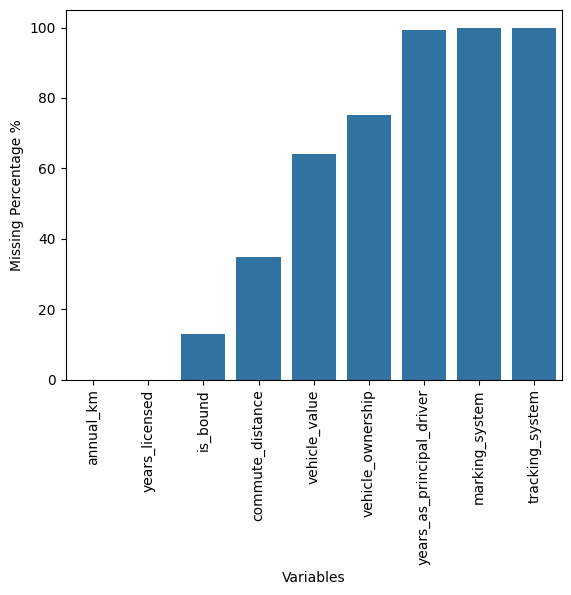

In [94]:
show_percent_missing(full_df)

Over 80% of values missing for 'years as principal driver', 'marking system' and 'tracking system'. These variables will be dropped and the remaining columns with missing values will be handled on a case by case situation

In [95]:
# Dropping Columns With Missing Values Over 80% on training data
full_df.drop(columns=['years_as_principal_driver', 'marking_system','tracking_system'], axis =1, inplace=True)
full_df.head()

,quote_date,vehicle_year,vehicle_make,vehicle_model,annual_km,commute_distance,vehicle_ownership,vehicle_value,vehicle_use,gender,...,years_licensed,multi_product,marital_status,occupation,conviction_count_minor_3yrs,conviction_count_major_3yrs,conviction_count_criminal_3yrs,assigned_losses_pd_5yrs,suspension_count,is_bound
0,2016-01-02,2006,VOLKSWAGEN,JETTA 2.5 4P,10000.0,NaN,Owned,3000.0,Pleasure,Male,...,25.0,No,Married,Trades,0,0,0,0,0,0.0
1,2016-01-02,2017,HYUNDAI,ELANTRA GL 4DR,20000.0,NaN,Owned,1.0,Business,Male,...,10.0,No,Married,Not Known,0,0,0,0,0,0.0
2,2016-01-02,2015,CHEVROLET TRUCK/VAN,SILVERADO 2500 HD LT CREW CAB 4WD,15000.0,NaN,NaN,NaN,Pleasure,Male,...,39.0,No,Single,Not Known,0,0,0,0,0,0.0
3,2016-01-02,2010,TOYOTA,COROLLA CE 4DR,20000.0,20.0,NaN,NaN,Commute,Male,...,3.0,Yes,Single,Not Known,0,0,0,0,0,0.0
4,2016-01-04,2013,HONDA,CIVIC LX 4DR,30000.0,30.0,NaN,NaN,Commute,Male,...,2.0,Yes,Single,Not Known,0,0,0,0,0,0.0


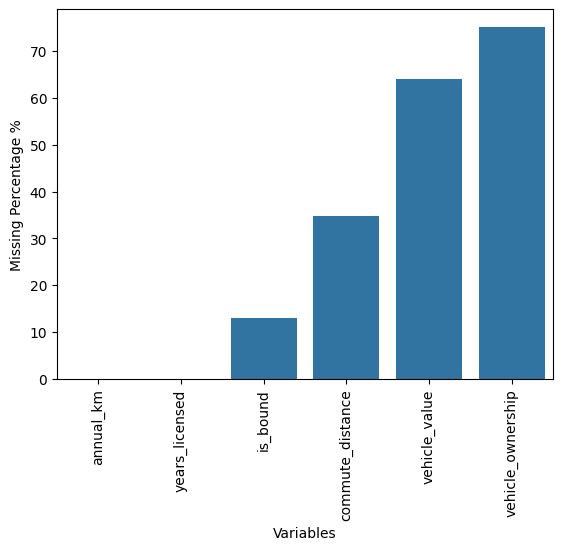

In [96]:
show_percent_missing(full_df)

(0.0, 0.03)

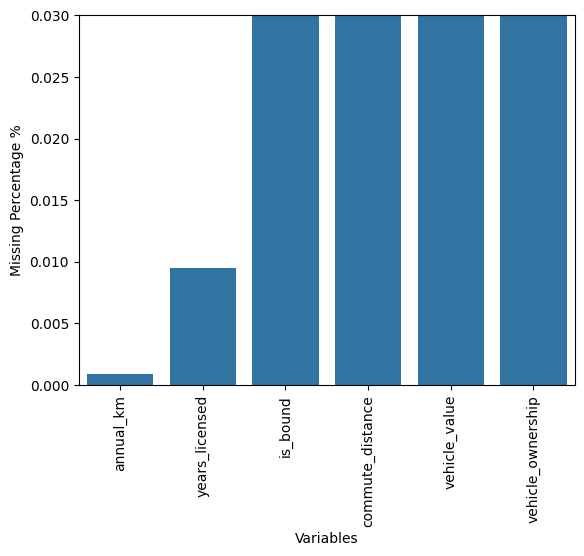

In [97]:
nan_percent = percent_missing(full_df)

sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)
plt.ylabel('Missing Percentage %')
plt.xlabel('Variables')
plt.ylim(0,0.03)

Before we proceed to fill in values for the remaining variables with missing data, I will check for 'abnormal' values in the variables and remove them

In [98]:
# Filling missing values with the median
full_df["annual_km"] = full_df["annual_km"].fillna(full_df["annual_km"].median())

# Filling missing values with the median
full_df["vehicle_ownership"] = full_df["vehicle_ownership"].fillna(full_df["vehicle_ownership"].mode()[0])


# Filling missing values with median of each year_of_birth
full_df['years_licensed'] = full_df.groupby('year_of_birth')['years_licensed'].transform(lambda value: value.fillna(value.median()))

# Filling missing values with median of each vehicle make
full_df['vehicle_value'] = full_df.groupby('vehicle_make')['vehicle_value'].transform(lambda value: value.fillna(value.median()))

# Filling remaining missing values with median of vehicle value for rows with blank vehicle model
full_df['vehicle_value'] = full_df['vehicle_value'].fillna(full_df['vehicle_value'].median())


# Indexing retirees and unemployed to fill them with zeros
index_to_fill = full_df[(full_df['occupation'] == 'Retired') | (full_df['occupation'] == 'Unemployed')].index

# Replacing commute distances of indexed group with zero
full_df.loc[index_to_fill, 'commute_distance'] = 0

# Filling remaining missing values with median of each occupation
full_df['commute_distance'] = full_df.groupby('occupation')['commute_distance'].transform(lambda value: value.fillna(value.median()))

# Filling remaining missing values with median of commute_distance for rows with blank occupation
full_df['commute_distance'] = full_df['commute_distance'].fillna(full_df['commute_distance'].median());

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

In [99]:
full_df.isnull().sum()

,0
quote_date,0
vehicle_year,0
vehicle_make,0
vehicle_model,0
annual_km,0
commute_distance,0
vehicle_ownership,0
vehicle_value,0
vehicle_use,0
gender,0


In [100]:
# Calculate frequency for each category
frequency_encoding = full_df['vehicle_model'].value_counts()

# Map the frequencies back to the original column
full_df['vehicle_model'] = full_df['vehicle_model'].map(frequency_encoding)

print(full_df['vehicle_model'].sort_values(ascending=False))



102550    2262
29117     2262
29025     2262
115893    2262
29071     2262
          ... 
79380        1
54570        1
54518        1
54786        1
90602        1
Name: vehicle_model, Length: 115984, dtype: int64


In [101]:
# Groupoing vehicle makes
category_mapping = {'1FTFW1EF8BFA01523': 'FORD', 'FORD F150': 'FORD', 'F150': 'FORD', 'F250': 'FORD',
                    'FORD EDGE': 'FORD', 'FORD FOCUS': 'FORD', 'FORD MUSTANG': 'FORD', 'FORD TRUCK/VAN': 'FORD',
                    'FORD CAMION/VAN': 'FORD', '2XXXXXXXXXXXXXXXXXX': 'NISSAN','PASSAT': 'NISSAN',
                    'NISSAN CAMION/VAN': 'NISSAN', 'NISSAN TRUCK/VAN': 'NISSAN', 'NISSSAN': 'NISSAN', 'NISAN': 'NISSAN',
                    'ACCURA': 'ACURA', 'ACURA CAMION/VAN': 'ACURA', 'ACURA TRUCK/VAN': 'ACURA', 'ALFA': 'ALFA ROMEO',
                    'AMERICAN MOTORS': 'AMC', 'ARTIC CAT': 'ARCTIC CAT', 'ARTCIT CAT': 'ARCTIC CAT',
                    'AUDI TRUCK/VAN': 'AUDI', 'BENTLEY TRUCK/VAN': 'BENTLEY', 'BMW CAMION/VAN': 'BMW',
                    'BMW TRUCK/VAN': 'BMW', 'BOMBADIER': 'BOMBARDIER', 'BUICK TRUCK/VAN': 'BUICK',
                    'CADILLAC CAMION/VAN': 'CADILLAC', 'CADILLAC TRUCK/VAN': 'CADILLAC', 'CADILLIAC': 'CADILLAC',
                    'CEVROLET': 'CHEVROLET', 'CHEVY': 'CHEVROLET', 'CHCVIOE': 'CHEVROLET', 'CHEV': 'CHEVROLET',
                    'CHEVRELOT': 'CHEVROLET', 'CHEVROLE': 'CHEVROLET', 'CHEVROLER': 'CHEVROLET',
                    'CHEVROLET CAMION/VAN': 'CHEVROLET', 'CHEVROLET TRUCK/VAN': 'CHEVROLET', 'CHEV CRUZ': 'CHEVROLET',
                    'CHRSYLER': 'CHRYSLER', 'CHRYLSER': 'CHRYSLER', 'CHRYSLER TRUCK/VAN': 'CHRYSLER',
                    'CRYSLER': 'CHRYSLER', 'DODDGE': 'DODGE', 'DODGE GRAND CARAVAN': 'DODGE', 'DODGE RAM': 'DODGE',
                    'DODGE/RAM': 'DODGE', 'DODGE/RAM CAMION/VAN': 'DODGE', 'DODGE/RAM TRUCK/VAN': 'DODGE',
                    'HONDA CIVIC': 'HONDA', 'HONDA 650': 'HONDA', 'HONDA ACCORD': 'HONDA', 'HONDA CAMION/VAN': 'HONDA',
                    'HONDA  CIVIC': 'HONDA', 'HONDA CR- V': 'HONDA', 'HONDA TRUCK/VAN': 'HONDA', 'HONODA': 'HONDA',
                    'VOLKSWAGON': 'VOLKSWAGEN', 'VOLKSWAGON JETTA': 'VOLKSWAGEN', 'VOLLKS': 'VOLKSWAGEN',
                    'VW': 'VOLKSWAGEN', 'WV': 'VOLKSWAGEN', 'VOLKS': 'VOLKSWAGEN',
                    'VOLKSWAGEN CAMION/VAN': 'VOLKSWAGEN', 'VOLKWAGEN TRUCK/VAN': 'VOLKSWAGEN',
                    'VOLKSWAGEN CAMION/VAN': 'VOLKSWAGEN', 'VOLKSWAGENJAVASCRIPT:VOID(0)': 'VOLKSWAGEN',
                    'TOTOTA': 'TOYOTA', 'TOYOATA': 'TOYOTA', 'TOYOTA CAMION/VAN': 'TOYOTA',
                    'TOYOTA HIGHLANDER': 'TOYOTA', 'TOYOTA TRUCK/VAN': 'TOYOTA', 'TOYOTO': 'TOYOTA', 'TOYTO': 'TOYOTA',
                    'PORCHE': 'PORSCHE', 'PORSCHE CAMION/VAN': 'PORSCHE', 'PORSCHE TRUC/VAN': 'PORSCHE',
                    'PROSCHE': 'PORSCHE', 'PONITAC': 'PONTIAC', 'PONTAIC': 'PONTIAC', 'PONTIAC CAMION/VAN': 'PONTIAC',
                    'PONTIAC TRUCK/VAN': 'PONTIAC', 'PONTIIAC': 'PONTIAC', 'PLYMONTH': 'PLYMOUTH',
                    'PLYMOUTH TRUCK/VAN': 'PLYMOUTH', 'MITIBUSHI': 'MITSUBISHI', 'HUNDAI': 'HYUNDAI',
                    'HUNDAY': 'HYUNDAI', 'HYNDAI': 'HYUNDAI', 'HYNDEI': 'HYUNDAI', 'HYUANDAI': 'HYUNDAI',
                    'HYUNDAI CAMION/VAN': 'HYUNDAI', 'HYUNDAI TRUCK/VAN': 'HYUNDAI', 'HYUNDIA': 'HYUNDAI',
                    'INFINITI TRUCK/VAN': 'INFINITI', 'INFINITY': 'INFINTI', 'INFINTI': 'INFINITI',
                    'JEEP WRANGLER': 'JEEP', 'JEPP': 'JEEP', 'LAND ROVER': 'LANDROVER', 'MAZDA 3': 'MAZDA',
                    'MAZDA CAMION/VAN': 'MAZDA', 'MAZDA TRUCK/VAN': 'MAZDA', 'MAZDA3': 'MAZDA', 'MAZDS': 'MAZDA',
                    'MECEDEZ': 'MERCEDES', 'MERCEDES BENZ': 'MERCEDES', 'MERCEDES-BENZ': 'MERCEDES',
                    'MERCEDES-BENZ TRUCK': 'MERCEDES'}


full_df['vehicle_make'] = full_df['vehicle_make'].map(category_mapping).fillna(full_df['vehicle_make'])

In [102]:
# Defining Categorical columns. Numeric columns excluding is_bound were obtained above
num_cols
cat_cols = full_df.select_dtypes(include='object').columns


full_df[cat_cols] = full_df[cat_cols].astype(str)
full_df[cat_cols] = full_df[cat_cols].apply(lambda x: x.astype(str))

In [103]:
# Obtainig Dummies
full_df = pd.get_dummies(full_df, drop_first=True)

full_df.tail()

,quote_date,vehicle_year,vehicle_model,annual_km,commute_distance,vehicle_value,year_of_birth,years_licensed,conviction_count_minor_3yrs,conviction_count_major_3yrs,...,occupation_Professional/Health,occupation_Professional/Other,occupation_Professional/Social,occupation_Retired,occupation_Sales,occupation_Service Work,occupation_Student,occupation_Trades,occupation_Tradesman,occupation_Unemployed
115979,2017-02-27,2012,1441,20000.0,16.0,18000.0,1988,9.0,0,0,...,False,False,False,False,False,False,False,False,False,False
115980,2017-02-27,2011,38,10000.0,8.0,12418.0,1973,27.0,0,0,...,False,False,False,False,False,False,False,False,False,False
115981,2017-02-27,2007,178,15000.0,5.0,28000.0,1961,32.0,0,0,...,False,False,False,False,False,False,False,False,False,False
115982,2017-02-27,2014,29,12000.0,13.0,35000.0,1991,9.0,0,0,...,False,False,False,False,False,False,False,False,False,False
115983,2017-02-27,2017,32,25000.0,23.0,20000.0,1959,41.0,0,0,...,False,True,False,False,False,False,False,False,False,False


In [104]:
full_df.drop(columns = 'quote_date', axis=1, inplace = True)


num_cols = list(full_df.select_dtypes(include=['float64', 'int64']).columns)

num_cols.remove('is_bound')
num_cols

['vehicle_year',
 'vehicle_model',
 'annual_km',
 'commute_distance',
 'vehicle_value',
 'year_of_birth',
 'years_licensed',
 'conviction_count_minor_3yrs',
 'conviction_count_major_3yrs',
 'conviction_count_criminal_3yrs',
 'assigned_losses_pd_5yrs',
 'suspension_count']

# Standardizing Numeric Variables

In [105]:
scaler = StandardScaler()

full_df[num_cols] = scaler.fit_transform(full_df[num_cols])

full_df.head()

,vehicle_year,vehicle_model,annual_km,commute_distance,vehicle_value,year_of_birth,years_licensed,conviction_count_minor_3yrs,conviction_count_major_3yrs,conviction_count_criminal_3yrs,...,occupation_Professional/Health,occupation_Professional/Other,occupation_Professional/Social,occupation_Retired,occupation_Sales,occupation_Service Work,occupation_Student,occupation_Trades,occupation_Tradesman,occupation_Unemployed
0,-0.514575,-0.620318,-0.668117,-0.209912,-1.488340,-0.006557,0.261805,-0.315901,-0.051373,-0.070281,...,False,False,False,False,False,False,False,True,False,False
1,1.384743,2.115033,0.734816,-0.209912,-1.736455,-0.131255,-0.663484,-0.315901,-0.051373,-0.070281,...,False,False,False,False,False,False,False,False,False,False
2,1.039413,-0.564044,0.033349,-0.209912,0.083580,-0.116585,1.125409,-0.315901,-0.051373,-0.070281,...,False,False,False,False,False,False,False,False,False,False
3,0.176086,3.919842,0.734816,0.599788,-0.412816,0.066795,-1.095286,-0.315901,-0.051373,-0.070281,...,False,False,False,False,False,False,False,False,False,False
4,0.694082,3.244546,2.137749,1.409489,-0.247351,0.044790,-1.156972,-0.315901,-0.051373,-0.070281,...,False,False,False,False,False,False,False,False,False,False


In [106]:
full_df['is_bound']

,is_bound
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
115979,NaN
115980,NaN
115981,NaN
115982,NaN


In [107]:
condition = (full_df['is_bound'].isnull())

train_data = full_df[~condition]

test_data = full_df[condition]

In [108]:
x = train_data.drop('is_bound', axis=1)
y = train_data['is_bound']


# Modelling and Model Tuning

In [109]:
# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [110]:
# Initialize and train the model
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [111]:
# Get the probabilities for the positive class
y_probs = model.predict_proba(x_val)[:, 1]
y_probs

array([0.1 , 0.14, 0.11, ..., 0.27, 0.38, 0.19])

In [112]:
# Define thresholds
thresholds = np.linspace(0, 1, 100)
fpr_list = []
fnr_list = []

In [113]:
   # Loop over thresholds to calculate FPR and FNR
for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

    # Calculate FPR and FNR
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) != 0 else 0

    fpr_list.append(fpr)
    fnr_list.append(fnr)

# Interpolating FNR and FPR curves for the validation set
fnr_interp = interp1d(thresholds, fnr_list, kind='linear')
fpr_interp = interp1d(thresholds, fpr_list, kind='linear')

# Generating a finer range of thresholds for finding intersections
fine_thresholds = np.linspace(thresholds.min(), thresholds.max(), 500)
fnr_fine = fnr_interp(fine_thresholds)
fpr_fine = fpr_interp(fine_thresholds)

# Finding the intersection point
diffs = np.abs(fnr_fine - fpr_fine)
min_index = np.argmin(diffs)
optimal_threshold = fine_thresholds[min_index]
intersection_fnr_fpr = fnr_fine[min_index]  # FNR and FPR at intersection

# Print the optimal threshold
print(f"The threshold where validation FNR and FPR intersect is approximately: {optimal_threshold:.2f}")


The threshold where validation FNR and FPR intersect is approximately: 0.21


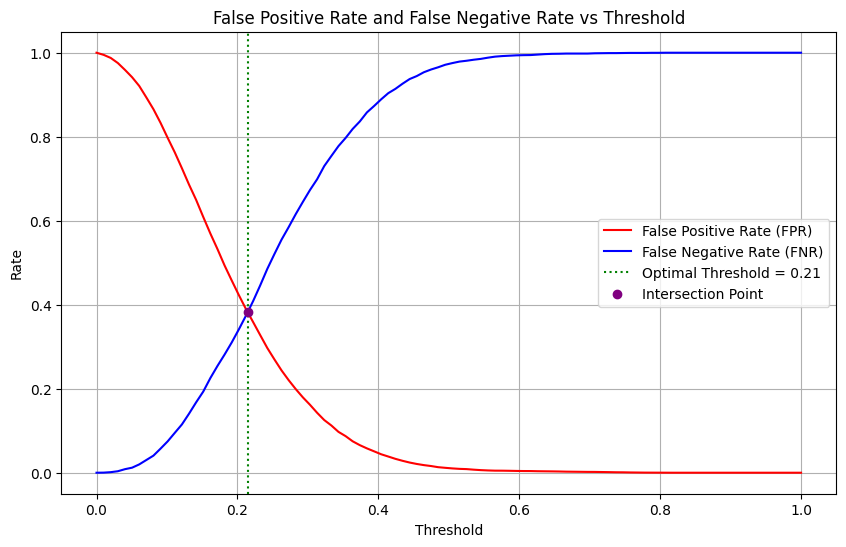

In [114]:
# Plot FPR and FNR against thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, fpr_list, label="False Positive Rate (FPR)", color="red")
plt.plot(thresholds, fnr_list, label="False Negative Rate (FNR)", color="blue")
# Mark the optimal threshold on the plot
plt.axvline(optimal_threshold, color='green', linestyle=':', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.scatter(optimal_threshold, intersection_fnr_fpr, color='purple', label='Intersection Point', zorder=5)
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.title("False Positive Rate and False Negative Rate vs Threshold")
plt.legend(loc="best")
plt.grid()
plt.show()

In [115]:
if 'is_bound' in test_data.columns:
    test_data = test_data.drop('is_bound', axis=1)

# Get probabilities for the positive class
y_probs_test = model.predict_proba(test_data)[:, 1]  # Probabilities for the positive class


y_pred_test = (y_probs_test >= optimal_threshold).astype(int)

rounded_test_predictions = y_pred_test.tolist()

# Print the final binary predictions
print(rounded_test_predictions)


[1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 

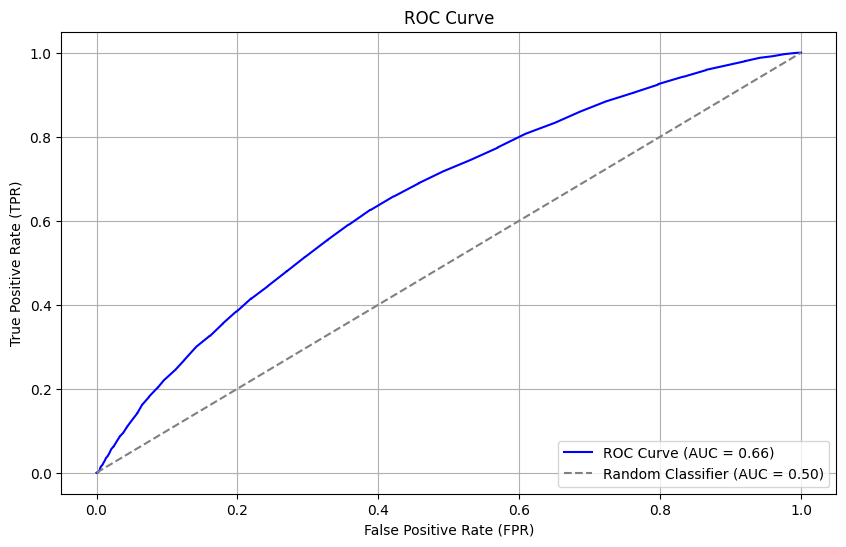

In [116]:
# Calculate the ROC curve
fpr, tpr, roc_thresholds = roc_curve(y_val, y_probs)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Classifier (AUC = 0.50)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()
